<a href="https://colab.research.google.com/github/benedictusjullian/bangkitcapstoneproject/blob/main/Capstone_ML_MODEL_for_corn_disease_detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

klik [HERE](https://medium.com/analytics-vidhya/how-to-fetch-kaggle-datasets-into-google-colab-ea682569851a) or [HERE](https://galhever.medium.com/how-to-import-data-from-kaggle-to-google-colab-8160caa11e2)to read how to fetch dataset from kaggle 

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"justcallmeben","key":"0d6e045aea0f7f68a4873d57897bb7bd"}'}

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

###The Corn or Maize disease dataset  that we are using is from [Here](https://www.kaggle.com/smaranjitghose/corn-or-maize-leaf-disease-dataset) 

In [ ]:
!kaggle datasets download -d smaranjitghose/corn-or-maize-leaf-disease-dataset

 98% 158M/161M [00:05<00:00, 45.7MB/s]
100% 161M/161M [00:05<00:00, 28.9MB/s]


# split the dataset into train and validation

In [ ]:
import zipfile
local_zip = '/content/corn-or-maize-leaf-disease-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

Run the codes below to split the dataset into train and validation with 8:2 ratio

In [ ]:
import os
import numpy as np

import shutil

rootdir= '/content/data' #path of the original folder

classes = ['Blight', 'Common_Rust', 'Gray_Leaf_Spot','Healthy']

for i in classes:
  os.makedirs(rootdir +'/train/' + i)

  os.makedirs(rootdir +'/test/' + i)

  source = rootdir + '/' + i

  allFileNames = os.listdir(source)

  np.random.shuffle(allFileNames)

  test_ratio = 0.2

  train_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                      [int(len(allFileNames)* (1 - test_ratio))])

  train_FileNames = [source+'/'+ name for name in train_FileNames.tolist()]
  test_FileNames = [source+'/' + name for name in test_FileNames.tolist()]

  for name in train_FileNames:
    shutil.copy(name, rootdir +'/train/' + i)

  for name in test_FileNames:
    shutil.copy(name, rootdir +'/test/' + i)

### Run the codes below to check the number of pictures in each label

In [ ]:
blight_dir = os.path.join('/content/data/Blight')
common_rust_dir = os.path.join('/content/data/Common_Rust')
gray_leaf_spot_dir = os.path.join('/content/data/Gray_Leaf_Spot')
healthy_dir = os.path.join('/content/data/Healthy')

print('total blight images:', len(os.listdir(blight_dir)))
print('total common rust images:', len(os.listdir(common_rust_dir)))
print('total gray leaf spot images:', len(os.listdir(gray_leaf_spot_dir)))
print('total healthy corn images:', len(os.listdir(healthy_dir)))

blight_files = os.listdir(blight_dir)
print(blight_files[:10])

common_rust_files = os.listdir(common_rust_dir)
print(common_rust_files[:10])

gray_leaf_spot_files = os.listdir(gray_leaf_spot_dir)
print(gray_leaf_spot_files[:10])

healthy_files = os.listdir(healthy_dir)
print(healthy_files[:10])

total blight images: 1146
total common rust images: 1306
total gray leaf spot images: 574
total healthy corn images: 1162
['Corn_Blight (669).JPG', 'Corn_Blight (875).JPG', 'Corn_Blight (764).JPG', 'Corn_Blight (212).JPG', 'Corn_Blight (549).JPG', 'Corn_Blight (1068).JPG', 'Corn_Blight (827).JPG', 'Corn_Blight (939).JPG', 'Corn_Blight (847).JPG', 'Corn_Blight (155).JPG']
['Corn_Common_Rust (571).JPG', 'Corn_Common_Rust (919).JPG', 'Corn_Common_Rust (687).JPG', 'Corn_Common_Rust (747).JPG', 'Corn_Common_Rust (1046).JPG', 'Corn_Common_Rust (1264).jpg', 'Corn_Common_Rust (1129).JPG', 'Corn_Common_Rust (535).JPG', 'Corn_Common_Rust (252).JPG', 'Corn_Common_Rust (281).JPG']
['Corn_Gray_Spot (557).jpg', 'Corn_Gray_Spot (460).JPG', 'Corn_Gray_Spot (170).JPG', 'Corn_Gray_Spot (229).JPG', 'Corn_Gray_Spot (255).jpg', 'Corn_Gray_Spot (69).JPG', 'Corn_Gray_Spot (439).JPG', 'Corn_Gray_Spot (337).jpg', 'Corn_Gray_Spot (55).jpg', 'Corn_Gray_Spot (457).JPG']
['Corn_Health (658).jpg', 'Corn_Health (114

# Lets Make the Model


### Create our first model

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator


tf.random.set_seed(42)

# Preprocess data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup path to our data directories
train_dir = "/content/data/train"
test_dir = "/content/data/test"

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                            batch_size=32,
                                            target_size=(224,224),
                                            class_mode="categorical",
                                            seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                            batch_size=32,
                                            target_size=(224,224),
                                            class_mode="categorical",
                                            seed=42)

# Build a CNN model
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224,224,3)),
  tf.keras.layers.Conv2D(10,3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10,3, activation="relu"),
  tf.keras.layers.Conv2D(10,3, activation="relu"),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10,activation="relu"),
  tf.keras.layers.Dense(4, activation="softmax")
])

# COmpile our CNN model
model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = valid_data,
                        validation_steps=len(valid_data))

Found 3348 images belonging to 4 classes.
Found 840 images belonging to 4 classes.
Epoch 1/5
105/105 [==============================] - 22s 203ms/step - loss: 1.1003 - accuracy: 0.5669 - val_loss: 0.9669 - val_accuracy: 0.5702
Epoch 2/5
105/105 [==============================] - 20s 192ms/step - loss: 0.9571 - accuracy: 0.5884 - val_loss: 0.9718 - val_accuracy: 0.5643
Epoch 3/5
105/105 [==============================] - 20s 191ms/step - loss: 0.9508 - accuracy: 0.5615 - val_loss: 0.9312 - val_accuracy: 0.5667
Epoch 4/5
105/105 [==============================] - 20s 191ms/step - loss: 0.9246 - accuracy: 0.5630 - val_loss: 0.9078 - val_accuracy: 0.5714
Epoch 5/5
105/105 [==============================] - 20s 191ms/step - loss: 0.9062 - accuracy: 0.5630 - val_loss: 0.8979 - val_accuracy: 0.5690


In [ ]:
# Saving the first model
model_1.save("/content/cap_corn_disease_detection_model1.h5")

## lets viualize our model accuracy

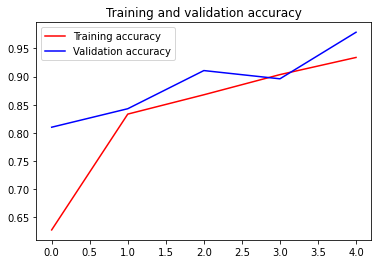

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history_1.history['accuracy']
val_acc = history_1.history['val_accuracy']
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

## Improving our model by adding more conv layers,more hidden layer ,rotation_range,widht shift and height_sifft

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/content/data/train"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/content/data/test"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_data = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(224,224),
	class_mode='categorical',
  batch_size=32
)

valid_data = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(224,224),
	class_mode='categorical',
  batch_size=32
)

model_2 = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 224x224 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(10, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(10, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(10, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(10, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax'),
])

# 2. Compile the model

model_2.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 3. Fit the model
history_2 = model_2.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data = valid_data,
                        validation_steps=len(valid_data))

Found 3348 images belonging to 4 classes.
Found 840 images belonging to 4 classes.
Epoch 1/10
105/105 [==============================] - 72s 403ms/step - loss: 1.0107 - accuracy: 0.5568 - val_loss: 0.5532 - val_accuracy: 0.7845
Epoch 2/10
105/105 [==============================] - 42s 404ms/step - loss: 0.5952 - accuracy: 0.7428 - val_loss: 0.4736 - val_accuracy: 0.7929
Epoch 3/10
105/105 [==============================] - 42s 401ms/step - loss: 0.4747 - accuracy: 0.8062 - val_loss: 0.4220 - val_accuracy: 0.8238
Epoch 4/10
105/105 [==============================] - 42s 402ms/step - loss: 0.4465 - accuracy: 0.8100 - val_loss: 0.4536 - val_accuracy: 0.8048
Epoch 5/10
105/105 [==============================] - 42s 401ms/step - loss: 0.4515 - accuracy: 0.8047 - val_loss: 0.4040 - val_accuracy: 0.8226
Epoch 6/10
105/105 [==============================] - 42s 402ms/step - loss: 0.4279 - accuracy: 0.8127 - val_loss: 0.4385 - val_accuracy: 0.8119
Epoch 7/10
105/105 [===========================

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 10)       

In [ ]:
# Saving our second model
model_2.save("/content/cap_corn_disease_detection_model2.h5")

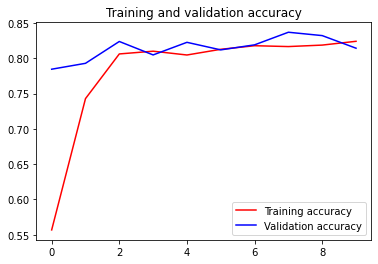

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history_2.history['accuracy']
val_acc = history_2.history['val_accuracy']
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

## Adding more neural network to futher improve our model

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/content/data/train"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/content/data/test"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_data = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(224,224),
	class_mode='categorical',
  batch_size=32
)

valid_data = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(224,224),
	class_mode='categorical',
  batch_size=32
)

model_3 = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 224x224 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(10, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(10, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(10, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(10, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax'),
])

# 2. Compile the model

model_3.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 3. Fit the model
history_3 = model_3.fit(train_data,
                        epochs=20,
                        steps_per_epoch=len(train_data),
                        validation_data = valid_data,
                        validation_steps=len(valid_data))

Found 3348 images belonging to 4 classes.
Found 840 images belonging to 4 classes.
Epoch 1/20
105/105 [==============================] - 54s 507ms/step - loss: 0.8633 - accuracy: 0.6428 - val_loss: 0.4950 - val_accuracy: 0.7988
Epoch 2/20
105/105 [==============================] - 53s 508ms/step - loss: 0.5174 - accuracy: 0.7897 - val_loss: 0.4929 - val_accuracy: 0.8024
Epoch 3/20
105/105 [==============================] - 53s 505ms/step - loss: 0.4851 - accuracy: 0.7963 - val_loss: 0.4322 - val_accuracy: 0.8071
Epoch 4/20
105/105 [==============================] - 53s 504ms/step - loss: 0.4446 - accuracy: 0.8059 - val_loss: 0.3474 - val_accuracy: 0.8524
Epoch 5/20
105/105 [==============================] - 53s 504ms/step - loss: 0.4234 - accuracy: 0.8103 - val_loss: 0.4022 - val_accuracy: 0.8524
Epoch 6/20
105/105 [==============================] - 53s 503ms/step - loss: 0.4110 - accuracy: 0.8175 - val_loss: 0.4548 - val_accuracy: 0.7690
Epoch 7/20
105/105 [===========================

In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 10)       

In [ ]:
# Saving our third model
model_3.save("/content/cap_corn_disease_detection_model3.h5")

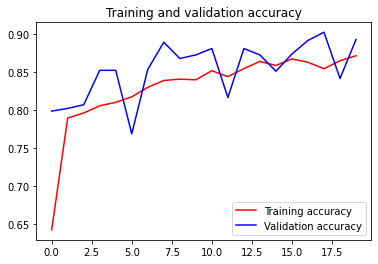

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history_3.history['accuracy']
val_acc = history_3.history['val_accuracy']
loss = history_3.history['loss']
val_loss = history_3.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model_2.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving blight4.jpg to blight4 (1).jpg
Saving blight3.jpg to blight3 (1).jpg
Saving blightx-Sporulation_on_leaf.jpg to blightx-Sporulation_on_leaf (1).jpg
blight4.jpg
[[1. 0. 0. 0.]]
blight3.jpg
[[1.0000000e+00 0.0000000e+00 1.8875157e-30 0.0000000e+00]]
blightx-Sporulation_on_leaf.jpg
[[0. 0. 0. 1.]]


In [ ]:
from google.colab import files
files.upload()

Saving cap_corn_disease_detection_model2.h5 to cap_corn_disease_detection_model2.h5


{'cap_corn_disease_detection_model2.h5': b'\x89HDF\r\n\x1a\n\x00\x00\x00\x00\x00\x08\x08\x00\x04\x00\x10\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xffP\xd0\x06\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00`\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x88\x00\x00\x00\x00\x00\x00\x00\xa8\x02\x00\x00\x00\x00\x00\x00\x01\x00\x07\x00\x01\x00\x00\x00\x18\x00\x00\x00\x00\x00\x00\x00\x10\x00\x10\x00\x00\x00\x00\x00 \x03\x00\x00\x00\x00\x00\x00h\x01\x00\x00\x00\x00\x00\x00TREE\x00\x00\x01\x00\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00\x00(\x00\x00\x00\x00\x00\x00\x18\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

In [ ]:

import tensorflow as tf

model = tf.keras.models.load_model('/content/cap_corn_disease_detection_model2.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("cap_corn_disease_detection_model2.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpxus9rw4c/assets


132632